In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Converting the data into pandas dataframe
data = pd.read_csv('C:/Users/LENOVO/boston.csv')

In [4]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
#Check the shape of dataframe
data.shape

(506, 14)

In [6]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [7]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

In [8]:
# Identifying the unique number of values in the dataset
data.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
PRICE      229
dtype: int64

In [9]:
# Check for missing values
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [10]:
# See rows with missing values
data[data.isnull().any(axis=1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE


In [11]:
# Viewing the data statistics
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [12]:
# Finding out the correlation between the features
corr = data.corr()
corr.shape

(14, 14)

<Axes: >

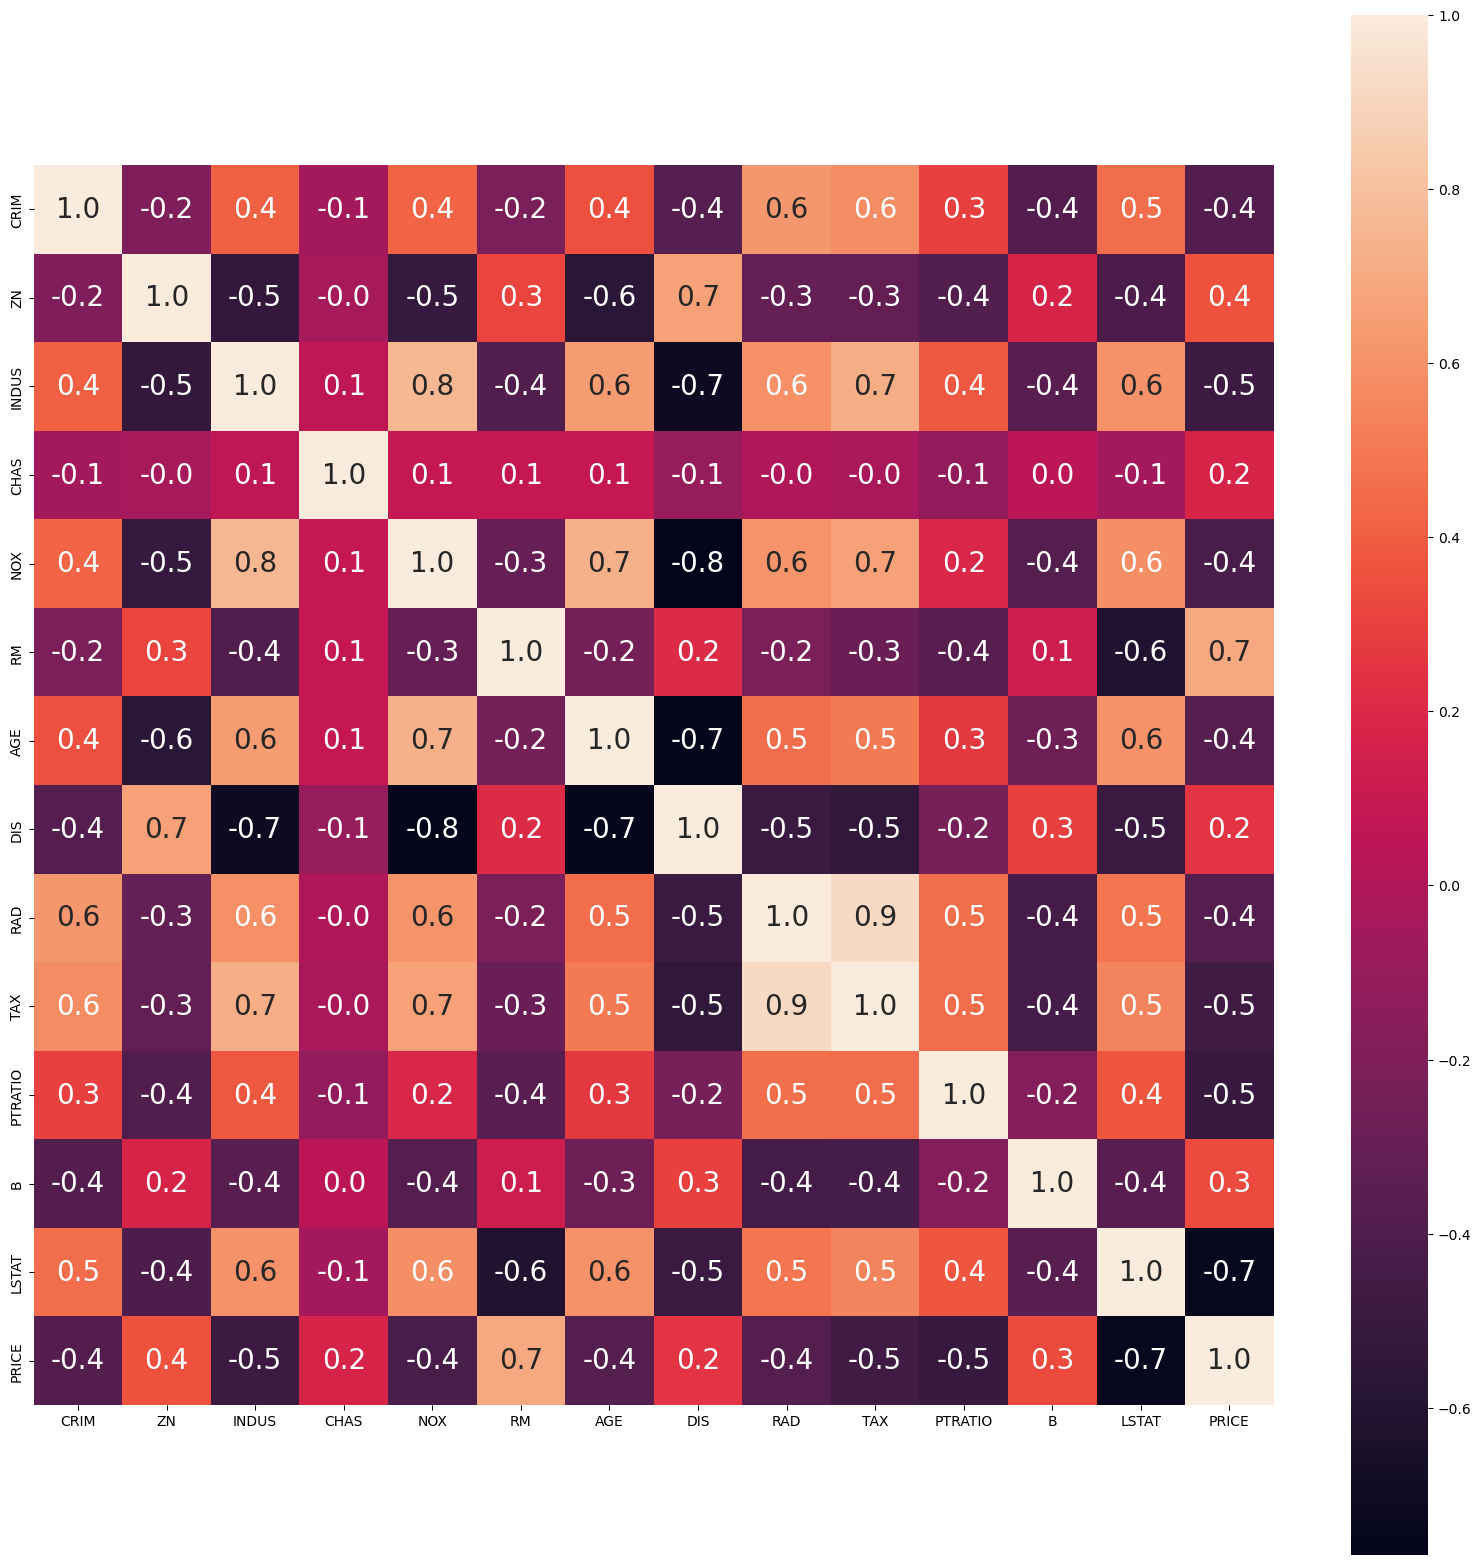

In [13]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size': 20})

In [14]:
# Spliting target variable and independent variables
X = data.drop(['PRICE'], axis = 1)
y = data['PRICE']

In [15]:
# Splitting to training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=42)

In [16]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

In [17]:
# Create a Linear regressor
lm = LinearRegression()
# Train the model using the training sets
lm.fit(X_train, y_train)

LinearRegression()

In [18]:
# Value of y intercept
lm.intercept_

31.631084035692954

In [19]:
#Converting the coefficient values to a dataframe
coeffcients = pd.DataFrame([X_train.columns,lm.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,CRIM,-0.13347
1,ZN,0.035809
2,INDUS,0.049523
3,CHAS,3.119835
4,NOX,-15.417061
5,RM,4.057199
6,AGE,-0.010821
7,DIS,-1.385998
8,RAD,0.242727
9,TAX,-0.008702


In [20]:
# Model prediction on train data
y_pred = lm.predict(X_train)

In [21]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.7434997532004697
MAE: 3.3568267821682047
MSE: 22.545481487421426
RMSE: 4.748208239685937


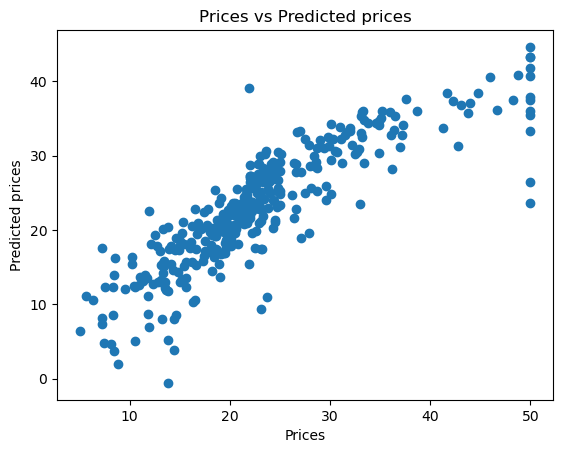

In [22]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

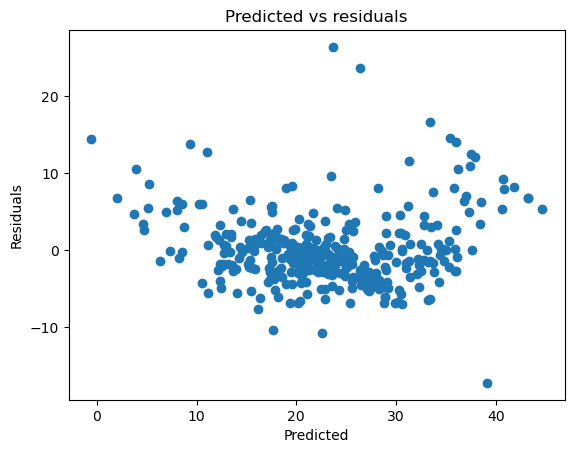

In [23]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

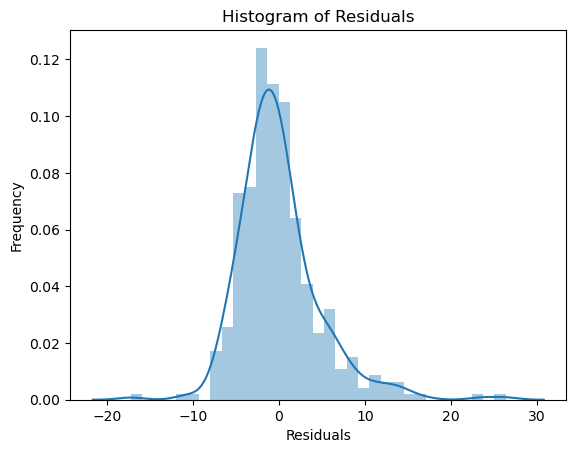

In [24]:
# Checking Normality of errors
sns.distplot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [25]:
# Predicting Test data with the model
y_test_pred = lm.predict(X_test)

In [26]:
# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.7112260057484923
MAE: 3.1627098714574156
MSE: 21.517444231177286
RMSE: 4.638689926172829


In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [28]:
import keras
from keras.layers import Dense, Activation,Dropout
from keras.models import Sequential
model = Sequential()
model.add(Dense(128,activation = 'relu',input_dim =13))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(16,activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [29]:
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
12/12 [==============================] - 1s 4ms/step - loss: 615.1598
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 595.4869
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 552.0193
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 447.8795
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 254.2804
Epoch 6/100
12/12 [==============================] - 0s 1ms/step - loss: 95.4523
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: 71.0691
Epoch 8/100
12/12 [==============================] - 0s 2ms/step - loss: 40.7864
Epoch 9/100
12/12 [==============================] - 0s 2ms/step - loss: 31.5237
Epoch 10/100
12/12 [==============================] - 0s 2ms/step - loss: 25.4305
Epoch 11/100
12/12 [==============================] - 0s 2ms/step - loss: 23.0258
Epoch 12/100
12/12 [==============================] - 0s 2ms/step - loss: 21.2644
Epoch 13/100
12/12 [

In [30]:
y_pred = model.predict(X_test)

5/5 [==============================] - 0s 5ms/step


In [31]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.8679898012177112


In [32]:
from sklearn.metrics import mean_squared_error
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print(rmse)

3.1363176748852797
